In [1]:
from morphology import *
from itkwidgets import view
import pyvista as pv

In [2]:
path = r"C:\Users\admin\bric-morphology\studies\1\data\new_label.nii"
d = run1(path)

invalid value encountered in true_divide


In [3]:
d

Curvature:
Describe:
Gaussian curvature: DescribeResult(nobs=33080, minmax=(-0.9270143360564338, 0.6925650461813694), mean=0.0009265608751267668, variance=0.0003151361172668633, skewness=-0.6824177935583409, kurtosis=641.4849550540418)
Mean Curvature: DescribeResult(nobs=33080, minmax=(-11.164933261689304, 2.003530887745582), mean=-0.036393610413788746, variance=0.0236023324140626, skewness=-24.875449437098716, kurtosis=1633.0628832694638)
Principal Curvature Min: DescribeResult(nobs=33080, minmax=(-22.327445835902942, 0.37421253142722244), mean=-0.11695391848508851, variance=0.06493465945898032, skewness=-44.26264848499041, kurtosis=3413.0056149959087)
Principal Curvature Max: DescribeResult(nobs=33080, minmax=(-0.4369593795897452, 4.007055976002169), mean=0.04681478338865683, variance=0.01672903713831578, skewness=6.900912087097542, kurtosis=111.60819329258808)
Shapes:
Gaussian curvature: (33080,)
Mean Curvature: (33080,)
Principal Curvature Min: (33080,)
Principal Curvature Max: (33

In [4]:
img = nib.load(path)
mri_3d_voxels = img.get_fdata()
mri_3d_voxels[mri_3d_voxels > 0] = 255

n = d.isosurface.verts.shape[0]
faces_rows = d.isosurface.faces.shape[0]
faces = np.column_stack([3*np.ones((faces_rows,1),dtype=np.int),d.isosurface.faces])
vertices = d.isosurface.verts
faces_count = np.prod(faces.shape)
faces1 = faces.flatten()[0:faces_count]
vertices, faces
curvedness_surf = pv.PolyData(vertices, faces1)
curvedness_surf.point_arrays['curvedness'] = d.surface_measures.curvedness

shape_index_surf = pv.PolyData(vertices, faces1)
shape_index_surf.point_arrays['shape_index'] = d.surface_measures.shape_index

sharpness_surf = pv.PolyData(vertices, faces1)
sharpness_surf.point_arrays['sharpness'] = d.surface_measures.sharpness

total_curvature_surf = pv.PolyData(vertices, faces1)
total_curvature_surf.point_arrays['total_curvature'] = d.surface_measures.total_curvature

point_cloud = pv.PolyData(vertices)

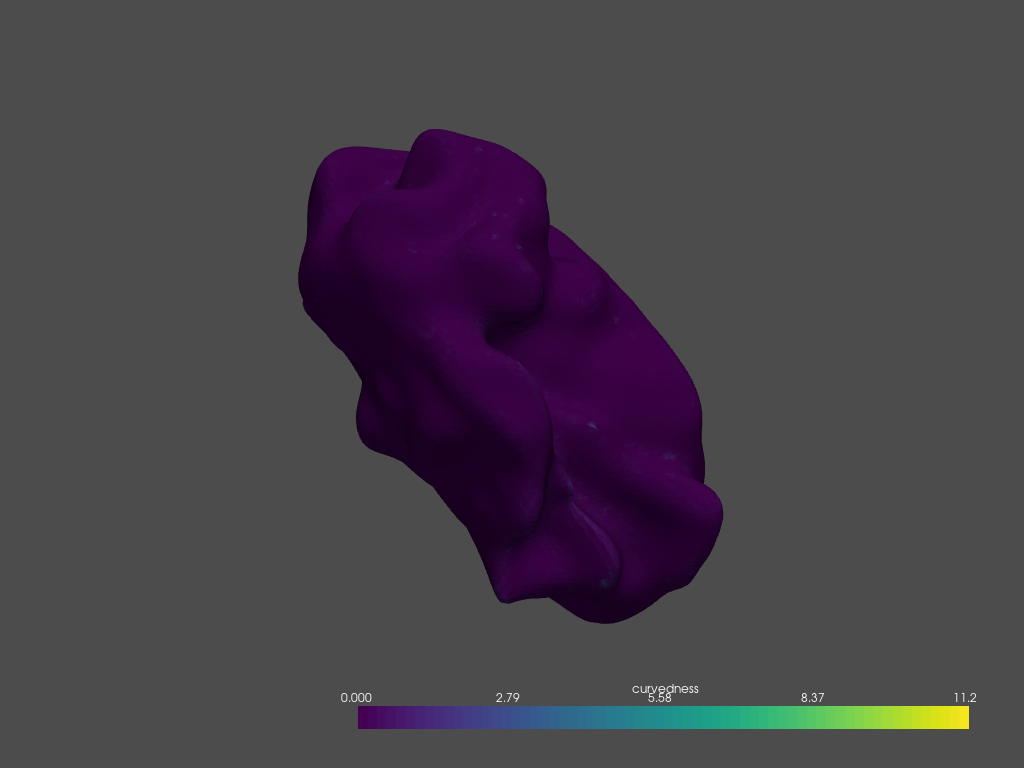

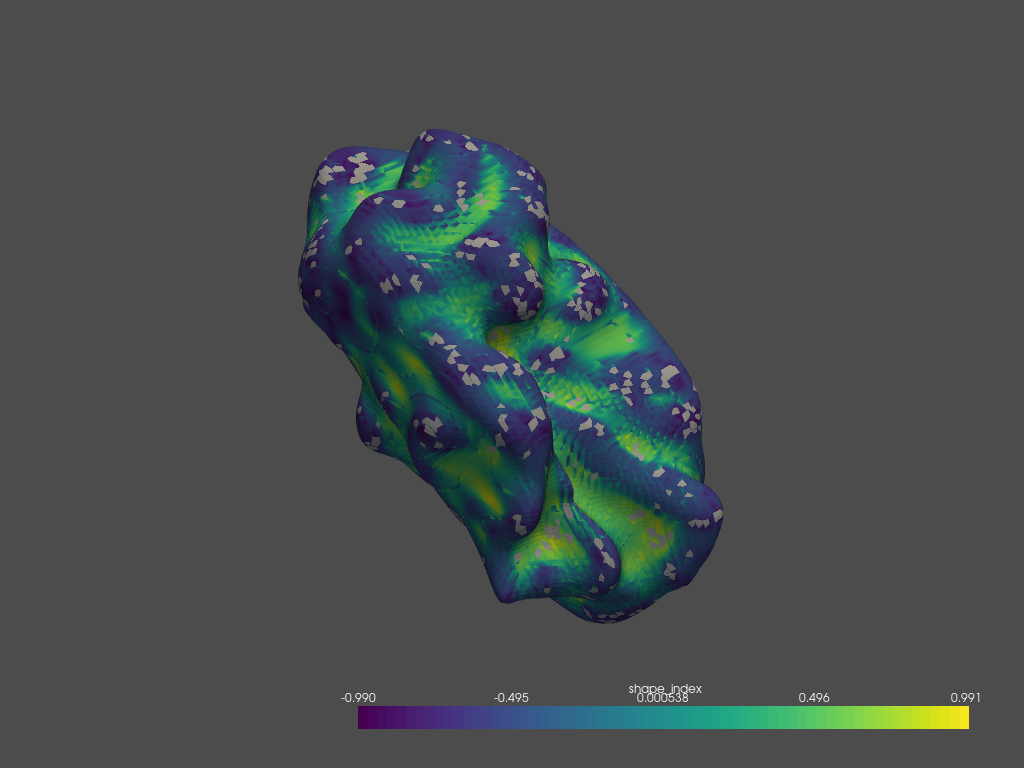

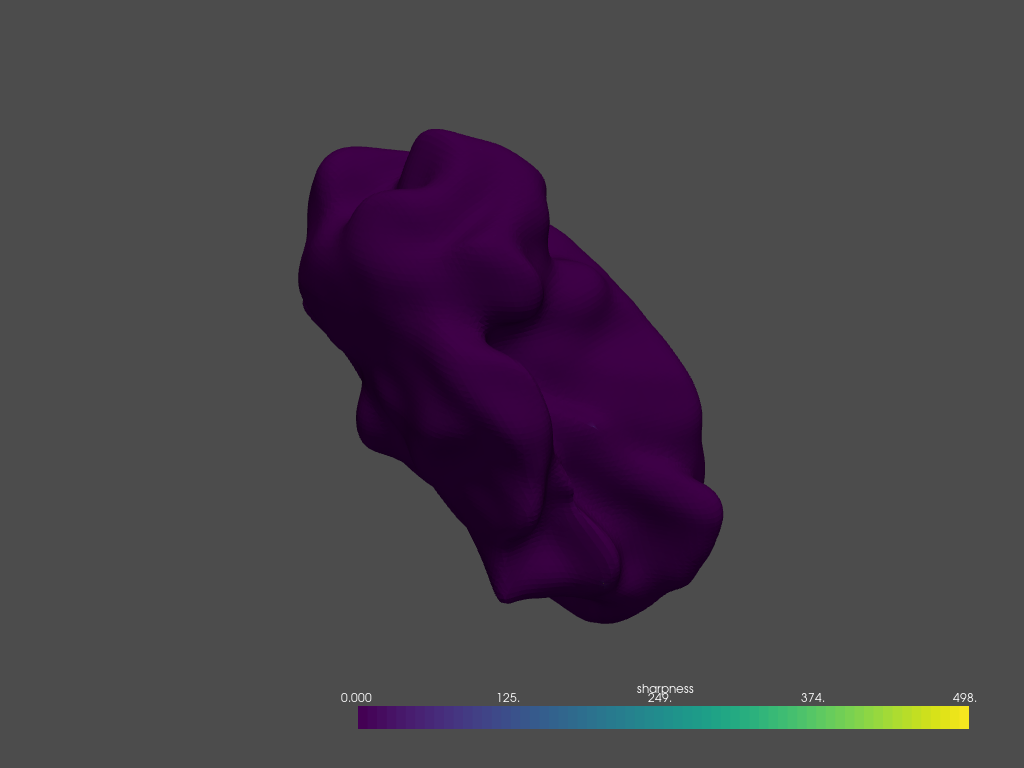

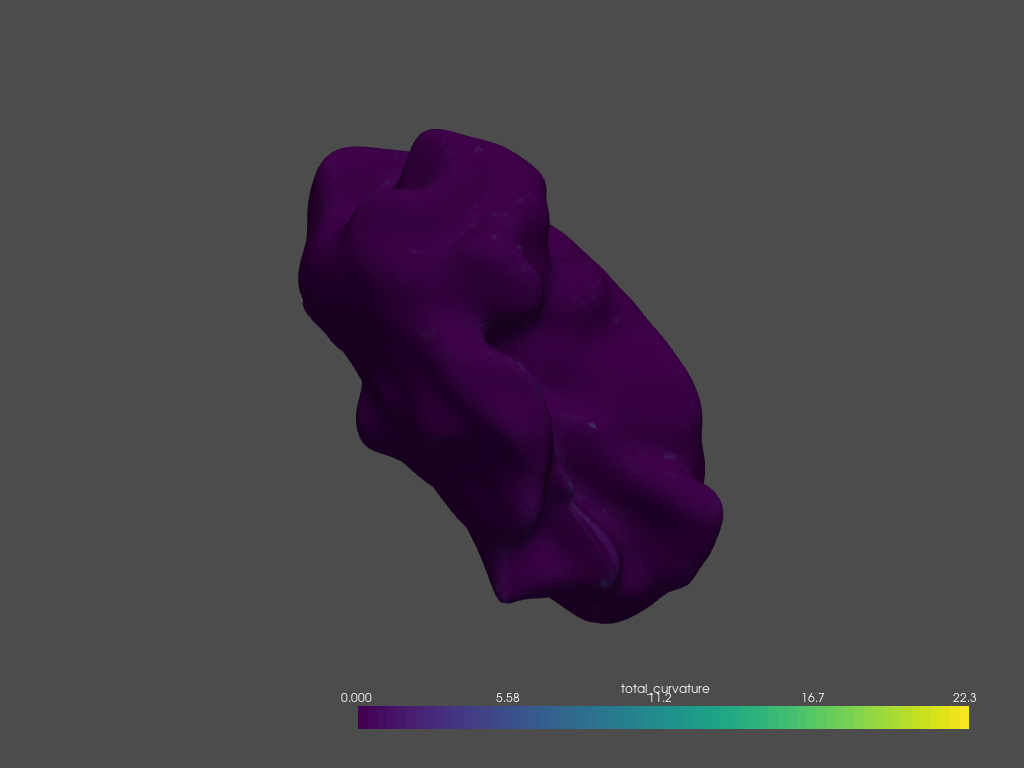

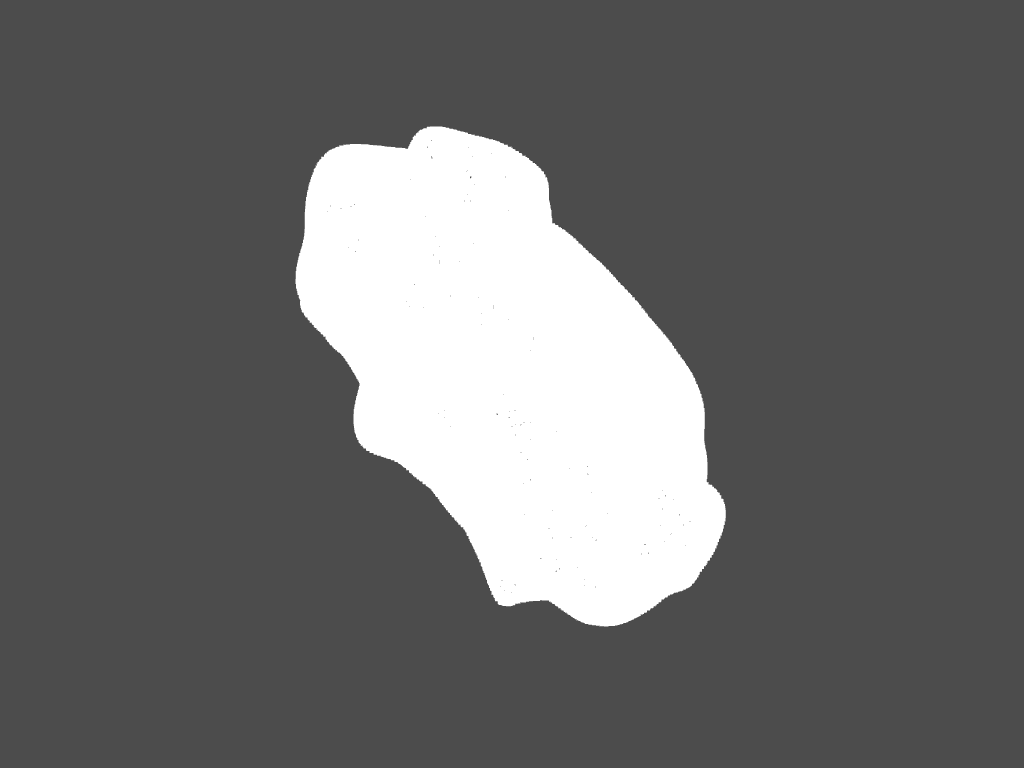

In [5]:
surfaces = [curvedness_surf, shape_index_surf, sharpness_surf, total_curvature_surf, point_cloud]
names    = ["curvedness", "shape index", "sharpness", "total_curvature", "point cloud" ]
for name,graph in zip(names,surfaces):
    graph.plot()
#     slices = graph.slice_orthogonal(x=0, y=0, z=0)
#     slices.plot()
    
geometries = dict(zip(names,surfaces))

IntSlider(value=22, description='X', max=86, min=22)

IntSlider(value=54, description='Y', max=150, min=54)

IntSlider(value=36, description='Z', max=138, min=36)

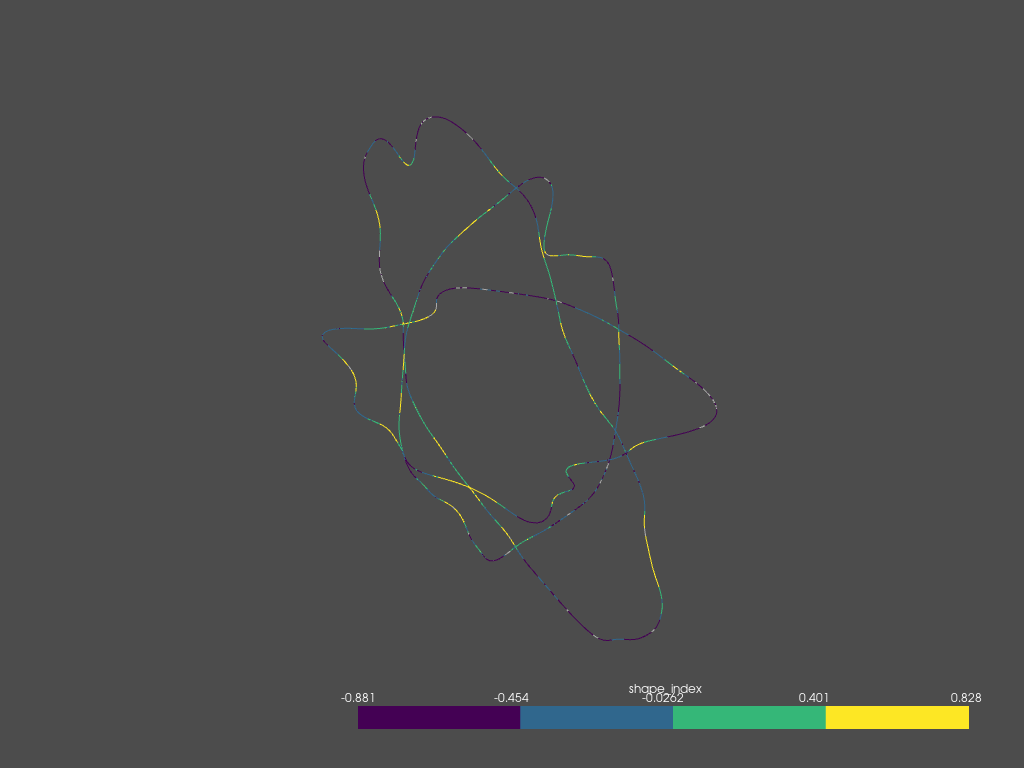

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
cmap = plt.cm.get_cmap("viridis", 4)


x_min,x_max,y_min,y_max,z_min,z_max = shape_index_surf.bounds

x_slider = widgets.IntSlider(description='X',min=x_min, max=x_max)
y_slider = widgets.IntSlider(description='Y',min=y_min, max=y_max)
z_slider = widgets.IntSlider(description='Z',min=z_min, max=z_max)
display(x_slider)
display(y_slider)
display(z_slider)

slices = shape_index_surf.slice_orthogonal()


def on_value_change(change):
    print(change)
    slices = shape_index_surf.slice(
        [x_slider.value, y_slider.value, z_slider.value]
    )
    #slices.plot(cmap=cmap)

x_slider.observe(on_value_change, names='value')        
slices.plot(cmap=cmap)




In [7]:
slices.bounds, shape_index_surf.bounds

([22.794647216796875,
  85.0195083618164,
  59.508975982666016,
  142.09048461914062,
  36.805213928222656,
  138.89401245117188],
 [22.4399356842041,
  86.51709747314453,
  54.64017868041992,
  150.21629333496094,
  36.4385986328125,
  138.95762634277344])

In [ ]:
view(geometries=geometries,axes=True,slicing_planes=True,select_roi=True)

In [9]:
type(slices)

pyvista.core.composite.MultiBlock

In [ ]:
view(geometries=[slices])

In [ ]:
np.histogram(mri_3d_voxels, range(255))